### Setup

In [141]:
from IPython.display import clear_output

In [142]:
!pip install google-play-scraper
!pip install transformers
!pip install Pillow==9.0.0
clear_output()

### Import Libraries

In [143]:
from google_play_scraper import app
import pandas as pd
import numpy as np

### Start Scraping

In [144]:
from google_play_scraper import Sort, reviews

result, continuation_token = reviews(
    'com.dafturn.mypertamina',
    lang='id',
    country='id',
    count=1000, 
    filter_score_with=None,
    sort=Sort.NEWEST)

### Convert to Pandas DataFrame

In [145]:
df = pd.DataFrame(np.array(result), columns=['review'])

df = df.join(pd.DataFrame(df.pop('review').tolist()))

In [146]:
df

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,8b824414-36a5-4447-9015-9308638a072b,Febriyanti Saja,https://play-lh.googleusercontent.com/a/AItbvm...,"Ini kenapa gabisa login ya game nya, padahal j...",1,0,None,2022-07-26 15:35:45,None,NaT
1,14b8b9d5-e2d1-4877-bad7-5d7aea14e38f,Agung Purwoko,https://play-lh.googleusercontent.com/a/AItbvm...,Masuknya sangat sangat susah & begitu bisa mas...,1,1,3.6.3,2022-07-26 15:06:14,None,NaT
2,b4daedaf-b5f8-4aae-97d2-a08b0e753ce0,Zamzani YBzUUI,https://play-lh.googleusercontent.com/a-/AFdZu...,Sayangnya blm bis buka mypertamina,5,0,3.6.3,2022-07-26 14:43:42,None,NaT
3,8d66c86c-7031-4dbc-b674-6ad1cd74f8cb,Razel R,https://play-lh.googleusercontent.com/a-/AFdZu...,Follow tiktok gua guys,1,0,3.6.2,2022-07-26 14:33:48,None,NaT
4,ae411be5-4696-462e-bd9f-b7270c9411d7,kurniawan sandi,https://play-lh.googleusercontent.com/a/AItbvm...,"Sulit di mengerti , semoga ngisingmu atos",1,0,3.6.3,2022-07-26 13:58:28,None,NaT
...,...,...,...,...,...,...,...,...,...,...
995,95e05fce-7c2b-441b-9cb2-c34cd13afc27,dedy ryanto,https://play-lh.googleusercontent.com/a-/AFdZu...,"Aplikasi cacat..gak bermutu,, mau ngisi bensin...",1,0,3.6.3,2022-07-21 12:03:57,None,NaT
996,b3f465a6-cd2e-446e-b120-648b527df435,Dicky Firmansyah,https://play-lh.googleusercontent.com/a-/AFdZu...,Ribet,1,0,3.6.3,2022-07-21 12:00:50,None,NaT
997,e6ba87ef-e0bb-4a9b-9716-29b43ab51322,Yoga Baskoro,https://play-lh.googleusercontent.com/a-/AFdZu...,Sangattttt menghambat pembelian BBM,1,0,None,2022-07-21 11:56:43,None,NaT
998,dcf380f7-8926-4786-aaeb-b211dc02db42,Dar Midi,https://play-lh.googleusercontent.com/a/AItbvm...,Ga bagus,1,0,3.6.3,2022-07-21 11:53:10,None,NaT


In [147]:
len(df)

1000

In [148]:
data = []

for i in df['content']:
  data.append(i)

### Sentiment Analysis

In [149]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('indonesian'))
len(stop_words)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


757

In [150]:
data_stopwords = 'https://raw.githubusercontent.com/Braincore-id/stopwords_twitter_indo/main/2022-07-19%2012.29.48%20stopwords_twitter.csv'
df_stopwords = pd.read_csv(data_stopwords, names=['stopword'])

In [151]:
new_stopwords = []

for word in df_stopwords['stopword']:
  new_stopwords.append(word)

In [152]:
stop_words.update(new_stopwords)
len(stop_words)

814

In [153]:
from nltk.tokenize import WordPunctTokenizer
from bs4 import BeautifulSoup
import re

tok = WordPunctTokenizer()
pat1 = r'@[A-Za-z0-9]+'
pat2 = r'https?://[A-Za-z0-9./]+'
pat3 = r'^RT[\s]+'
combined_pat = r'|'.join((pat1, pat2, pat3))
def tweet_cleaner(text):
    soup = BeautifulSoup(text, 'html.parser')
    souped = soup.get_text()
    stripped = re.sub(combined_pat, '', souped)
    try:
        clean = stripped.decode("utf-8-sig").replace(u"\ufffd", "?")
    except:
        clean = stripped
    letters_only = re.sub("[^a-zA-Z]", " ", clean)
    lower_case = letters_only.lower()
    # During the letters_only process two lines above, it has created unnecessay white spaces,
    # I will tokenize and join together to remove unneccessary white spaces
    words = tok.tokenize(lower_case)
    return (" ".join(words)).strip()

In [154]:
url_kamus_alay = 'https://raw.githubusercontent.com/algonacci/id-multi-label-hate-speech-and-abusive-language-detection/master/new_kamusalay.csv'
alay_dict = pd.read_csv(url_kamus_alay, names = ['original', 'replacement'], encoding='latin-1')
alay_dict_map = dict(zip(alay_dict['original'], alay_dict['replacement']))
def normalize_alay(text):
    return ' '.join([alay_dict_map[word] if word in alay_dict_map else word for word in text.split(' ')])

In [157]:
removed_slangwords = normalize_alay(str(data))

In [158]:
cleaned_data = tweet_cleaner(str(removed_slangwords))

In [ ]:
import matplotlib.pyplot as plt

plt.rcParams.update({
    "lines.color": "white",
    "patch.edgecolor": "white",
    "text.color": "white",
    "axes.facecolor": "black",
    "axes.edgecolor": "white",
    "axes.labelcolor": "white",
    "xtick.color": "white",
    "ytick.color": "white",
    "grid.color": "grey",
    "figure.facecolor": "black",
    "figure.edgecolor": "black",
    "savefig.facecolor": "black",
    "savefig.edgecolor": "black"})

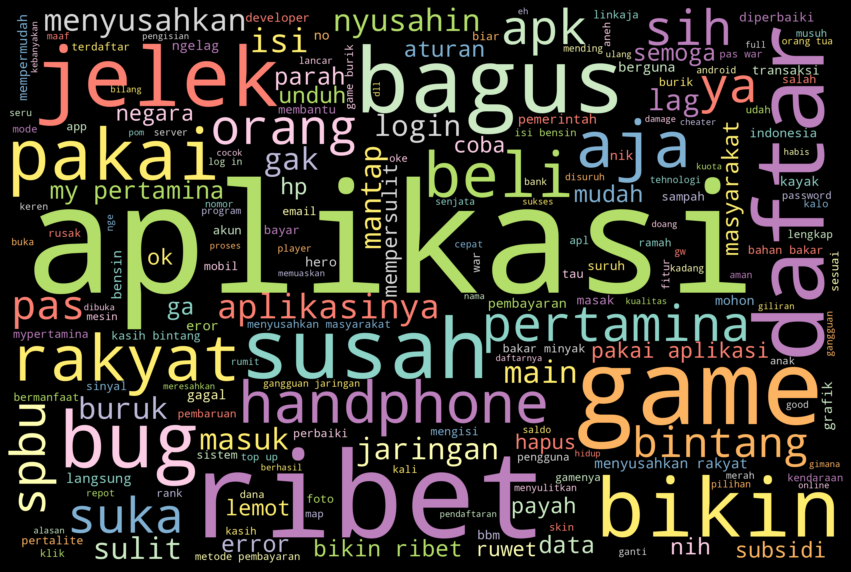

In [159]:
from wordcloud import WordCloud
from PIL import Image


text = str(cleaned_data).replace("'","")

wordcloud = WordCloud(width=3000, height=2000,
                      max_words=200, colormap='Set3',
                      background_color="black",
                      stopwords=stop_words).generate(text)

plt.figure(figsize=(15,15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
df['sentiment'] = ''
df

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,sentiment
0,b4daedaf-b5f8-4aae-97d2-a08b0e753ce0,Zamzani YBzUUI,https://play-lh.googleusercontent.com/a-/AFdZu...,Sayangnya blm bis buka mypertamina,5,0,3.6.3,2022-07-26 14:43:42,None,NaT,
1,8d66c86c-7031-4dbc-b674-6ad1cd74f8cb,Razel R,https://play-lh.googleusercontent.com/a-/AFdZu...,Follow tiktok gua guys,1,0,3.6.2,2022-07-26 14:33:48,None,NaT,
2,ae411be5-4696-462e-bd9f-b7270c9411d7,kurniawan sandi,https://play-lh.googleusercontent.com/a/AItbvm...,"Sulit di mengerti , semoga ngisingmu atos",1,0,3.6.3,2022-07-26 13:58:28,None,NaT,
3,7af902dc-9368-4c9f-8a21-2c6ec3afd57f,Google Amnesia,https://play-lh.googleusercontent.com/a/AItbvm...,apk HOAX,1,0,3.6.3,2022-07-26 13:55:15,None,NaT,
4,14b8b9d5-e2d1-4877-bad7-5d7aea14e38f,Agung Purwoko,https://play-lh.googleusercontent.com/a/AItbvm...,Masuknya sangat sangat susah & begitu bisa mas...,2,0,3.6.3,2022-07-26 13:45:50,None,NaT,
...,...,...,...,...,...,...,...,...,...,...,...
995,b3f465a6-cd2e-446e-b120-648b527df435,Dicky Firmansyah,https://play-lh.googleusercontent.com/a-/AFdZu...,Ribet,1,0,3.6.3,2022-07-21 12:00:50,None,NaT,
996,e6ba87ef-e0bb-4a9b-9716-29b43ab51322,Yoga Baskoro,https://play-lh.googleusercontent.com/a-/AFdZu...,Sangattttt menghambat pembelian BBM,1,0,None,2022-07-21 11:56:43,None,NaT,
997,dcf380f7-8926-4786-aaeb-b211dc02db42,Dar Midi,https://play-lh.googleusercontent.com/a/AItbvm...,Ga bagus,1,0,3.6.3,2022-07-21 11:53:10,None,NaT,
998,27de36f8-68c7-4a6c-9e77-016bb1a01bd5,Ahmad Deni Sthi,https://play-lh.googleusercontent.com/a-/AFdZu...,Instal trus uninstal Mulai dari 0 lagi,1,0,None,2022-07-21 11:49:28,None,NaT,


In [ ]:
from transformers import pipeline

pretrained_name = "w11wo/indonesian-roberta-base-indolem-sentiment-classifier-fold-0"

nlp = pipeline(
    "sentiment-analysis",
    model=pretrained_name,
    tokenizer=pretrained_name
)

In [ ]:
sentiment = []

for i in data:
  sentiment.append(nlp(i))

In [ ]:
predicted_label = []
confidence = []

for myList in sentiment:
  for item in myList:
    predicted_label.append(item['label'])
    confidence.append(item['score'])

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['sentiment'] = le.fit_transform(predicted_label)

In [ ]:
df[['content', 'sentiment']]

,content,sentiment
0,Sayangnya blm bis buka mypertamina,0
1,Follow tiktok gua guys,0
2,"Sulit di mengerti , semoga ngisingmu atos",0
3,apk HOAX,0
4,Masuknya sangat sangat susah & begitu bisa mas...,0
...,...,...
995,Ribet,0
996,Sangattttt menghambat pembelian BBM,0
997,Ga bagus,0
998,Instal trus uninstal Mulai dari 0 lagi,0


In [ ]:
def getAnalysis(score):
  if score == 0:
    return 'Negative'
  else:
    return 'Positive'

In [ ]:
df['label'] = df['sentiment'].apply(getAnalysis)

In [ ]:
unrelated = ['reviewId', 'userName', 'userImage', 'score', 'thumbsUpCount', 'reviewCreatedVersion', 'at', 'replyContent', 'repliedAt']
df.drop(unrelated, inplace=True, axis=1)

In [ ]:
df

,content,sentiment,label
0,Sayangnya blm bis buka mypertamina,0,Negative
1,Follow tiktok gua guys,0,Negative
2,"Sulit di mengerti , semoga ngisingmu atos",0,Negative
3,apk HOAX,0,Negative
4,Masuknya sangat sangat susah & begitu bisa mas...,0,Negative
...,...,...,...
995,Ribet,0,Negative
996,Sangattttt menghambat pembelian BBM,0,Negative
997,Ga bagus,0,Negative
998,Instal trus uninstal Mulai dari 0 lagi,0,Negative


In [ ]:
df.rename(columns={'sentiment':'label', 'label':'Sentiment'}, inplace=True)

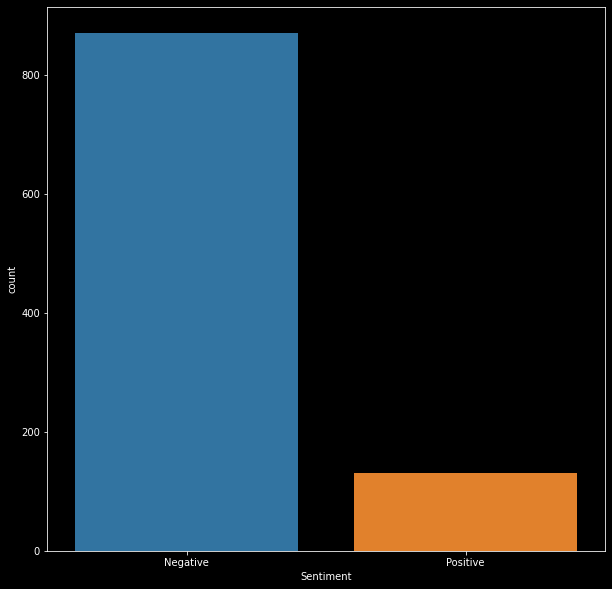

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.countplot(x=df["Sentiment"],data=df)
plt.savefig('sentiment.png')

### Word Embedding

In [ ]:
from nltk import word_tokenize
import tqdm
nltk.download('punkt')
from gensim.models import Word2Vec

sentences = [word_tokenize(comment) for comment in tqdm.tqdm(df['content'])]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!

100%|██████████| 1000/1000 [00:00<00:00, 5357.37it/s]


In [ ]:
sentences[:5]

[['Sayangnya', 'blm', 'bis', 'buka', 'mypertamina'],
 ['Follow', 'tiktok', 'gua', 'guys'],
 ['Sulit', 'di', 'mengerti', ',', 'semoga', 'ngisingmu', 'atos'],
 ['apk', 'HOAX'],
 ['Masuknya',
  'sangat',
  'sangat',
  'susah',
  '&',
  'begitu',
  'bisa',
  'masuk',
  'hanya',
  'menawarkan',
  'jasa',
  'online']]

In [ ]:
model = Word2Vec(sentences=sentences,
                 size=512,
                 window=20, 
                 min_count=2, 
                 workers=10,
                 iter=1000)

In [ ]:
model.vector_size

512

In [ ]:
model.similar_by_word("menyusahkan", topn=10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similar_by_word` (Method will be removed in 4.0.0, use self.wv.similar_by_word() instead).
  """Entry point for launching an IPython kernel.


[('berguna', 0.27211081981658936),
 ('miskin', 0.258645236492157),
 ('Menyusahkan', 0.25388503074645996),
 ('bot', 0.24765819311141968),
 ('Apl', 0.24645544588565826),
 ('susah', 0.23165762424468994),
 ('dasar', 0.2301311045885086),
 ('adanya', 0.2281390130519867),
 ('berat', 0.22645680606365204),
 ('playstore', 0.22545087337493896)]

In [ ]:
words = list(model.wv.vocab)
print(words)

['blm', 'buka', 'mypertamina', 'gua', 'guys', 'Sulit', 'di', 'mengerti', ',', 'semoga', 'apk', 'sangat', 'susah', '&', 'begitu', 'bisa', 'masuk', 'hanya', 'online', 'sedikit', 'menyusahkan', 'Ribet', 'banget', 'Ok', 'instal', 'ini', 'aplikasi', 'waktu', 'bayar', 'saldo', 'sudah', 'tapi', 'status', 'SPBU', 'belum', 'jadi', 'cash', 'dan', 'pihak', 'tidak', 'mau', 'tau', '(', 'bad', ')', 'Masih', 'banyak', 'perbaikan', '..', 'MULU', 'MAU', 'DAFTAR', '.', 'bensin', 'aja', 'ribet', 'anak', 'bangsa', '...', 'Membantu', 'Aplikasi', 'Makin', 'ke', 'makin', 'sana', 'ni', 'nih', 'game', 'begini', 'sekarang', 'Sekarang', 'lebih', 'pay', 'to', 'win', 'cuma', 'untuk', 'orang', 'beruang', 'biasa', 'agak', 'Masa', 'harus', 'top', 'up', 'dulu', 'mana', 'rusak', 'grafik', 'ny', 'juga', 'down', 'lgi', 'sistem', 'rank', 'gue', 'ketemu', 'player', 'mulu', 'mode', '1', 'vs', '7', 'sih', 'sama', 'satu', 'masalah', 'dikit', 'Lebih', 'bagus', 'kalo', 'ad', 'fitur', '*', '.....', '......', 'setiap', 'selalu', 

In [ ]:
X = model[model.wv.vocab]

df_gensim = pd.DataFrame(X)
df_gensim.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


,0,1,2,3,4,5,6,7,8,9,...,502,503,504,505,506,507,508,509,510,511
0,1.673481,2.221469,0.500376,0.013551,0.562075,0.305152,0.189132,0.229561,1.010528,-2.096870,...,-0.184380,0.736153,0.197218,0.834888,0.424271,1.016793,0.290268,0.033969,-1.133341,-1.273147
1,0.570408,-0.569616,-1.305884,2.335524,1.021188,-0.124111,-1.732030,1.705883,-0.925775,0.269636,...,0.648281,0.510347,-0.562888,0.629552,-0.815291,-2.737536,-0.316662,-1.986017,-0.291684,1.604372
2,0.252821,0.358632,-0.230194,-0.191621,0.374799,0.924978,1.163266,0.875112,1.276584,0.514120,...,-1.162985,-1.615240,-0.785574,-0.323953,-0.953864,-1.127523,-0.078791,0.712105,1.951258,-1.531006
3,-0.442867,-1.727079,-1.913365,-0.177582,0.268241,1.145831,-0.300928,-0.211713,0.302748,-0.394375,...,0.175279,0.067894,1.322137,-0.806084,1.039848,-1.037187,-0.638115,-0.209866,1.106958,-0.850850
4,-0.030293,0.281063,0.570046,-0.764446,-0.450562,0.150196,0.138277,-0.239577,-0.130827,1.397799,...,1.172986,-0.752613,-0.023884,-1.023778,-0.336349,0.020336,-1.359585,0.769005,0.687757,0.152269


In [ ]:
X_corr = df_gensim.corr()
values,vectors=np.linalg.eig(X_corr)

args = (-values).argsort()
values = vectors[args]
vectors = vectors[:, args]

new_vectors = vectors[:,:2]

neww_X = np.dot(X,new_vectors)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128078 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 128078 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128077 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 128077 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 120383 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 120388 missing from current font.
  font.se

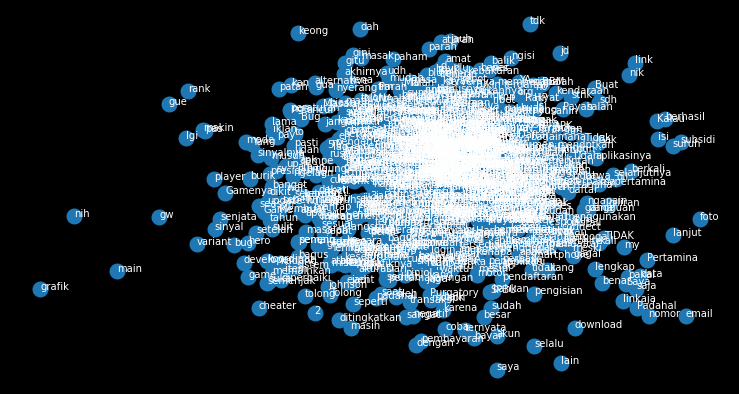

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(13,7))
plt.scatter(neww_X[:,0],neww_X[:,1],linewidths=10)
plt.axis('off')
vocab=list(model.wv.vocab)
for i, word in enumerate(vocab):
  plt.annotate(word,xy=(neww_X[i,0],neww_X[i,1]))
plt.savefig('gensim.png')